<a href="https://colab.research.google.com/github/diazgaby/computacional2/blob/main/comput2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#DESCOMPRIMIENDO ARCHIVOS DEL DRIVE
import os
from zipfile import ZipFile

#datos = "/content/drive/My Drive/Colab Notebooks/archive.zip"
datos ="/content/drive/MyDrive/ColabNotebooks/data/archive.zip"
with ZipFile(datos, 'r') as zip:
    zip.printdir()
    zip.extractall() 

Se han truncado las últimas 5000 líneas del flujo de salida.
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1551_class0.png 2019-09-25 15:19:08         6030
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1601_class0.png 2019-09-25 15:19:08         6058
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1651_class0.png 2019-09-25 15:19:08         5986
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1701_class0.png 2019-09-25 15:19:08         6004
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1751_class0.png 2019-09-25 15:19:08         6199
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1801_class0.png 2019-09-25 15:19:08         6190
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1851_class0.png 2019-09-25 15:19:08         6348
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1901_class0.png 2019-09-25 15:19:08         6248
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y1951_class0.png 2019-09-25 15:19:08         6144
IDC_regular_ps50_idx5/9346/0/9346_idx5_x2351_y2001_class0.png 2019-09-25 15:19:08   

In [ ]:
import numpy as np
import pandas as pd

from tensorflow import keras
from sklearn import datasets,  metrics, model_selection
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

from matplotlib.colors import Normalize

from skimage.io import imread

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from os import listdir
import re
import matplotlib.pyplot as plt
import matplotlib.image as plt_img
import seaborn as sns
from itertools import accumulate
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import loguniform

In [ ]:
#la funcion me devuelve la coordenada X y Y de las imagenes

def carga_datos(max_num = None, save=False, shuffle=True): #crea una funcion para cargar los datos cambiandolos de posicion(shuffle) y cos variables
#que seran utilizadas mas adealnte
    global base
    base = '/content/IDC_regular_ps50_idx5'  # ruta que incluye todos los datos
    archivos = listdir(base)#pasando las carpetas(279) a una lista con todos los nombres
    
    if max_num is None:
        max_num = len(archivos)#total  279 carpetas
      
   
    
   
          
    informacion = []#las imagenes tienen informacion de cada paciente y las cordenadas de los cortes por lotes
    for id_paciente in archivos[:max_num]:
        ruta_paciente = base + '/' + id_paciente
        columna = ['ID', 'cancer', 'ruta_imagen', 'x_coor', 'y_coor']#organizando la lista por columnas dependiendo la ruta de cada imagen

        for objetivo in range(2):#dos porque es cancer o no cancer
            clase = ruta_paciente + '/' + str(objetivo) # la clase de 0 o 1 
            for imagen in listdir(clase):
                info = []
                info.append(id_paciente)                    # ID del Patiente
                info.append(objetivo)                        # Clase (0: no-IDC, 1: IDC)
                info.append(clase + '/' + str(imagen)) # ruta de la imagen
                #print(objetivo)
                # desccomponiendo el nombre de la imagen para extraer las coodernadas X y Y
                # 10253_idx5_x1351_y1101_class0.png  -> '10253', 'id', '5', '', '1351', '', '1101', 'class0'
                img = re.split('[x y _]', imagen)#devuelve una lista formada por cadenas 
                info.append(img[4]) # X coordenada
                info.append(img[6]) # Y coordenada
                informacion.append(info)#guardando en la lista informacion las coordenadas

    df = pd.DataFrame(np.array(informacion), columns = columna)#ordenando en columnas
    df[['ID', 'cancer', 'x_coor', 'y_coor']] = df[['ID', 'cancer', 'x_coor', 'y_coor']].astype('int32')#guardando enteros
    
    if save:
        df.to_csv('./data.csv')#para guardar un archivo csv con los datos en columnas
    return df

data = carga_datos(max_num=5)#datos en columnas el numero es el total de imagenes que hay en las capetas(277523)
print(data)


         ID  cancer                                        ruta_imagen  \
0     10256       0  /content/IDC_regular_ps50_idx5/10256/0/10256_i...   
1     10256       0  /content/IDC_regular_ps50_idx5/10256/0/10256_i...   
2     10256       0  /content/IDC_regular_ps50_idx5/10256/0/10256_i...   
3     10256       0  /content/IDC_regular_ps50_idx5/10256/0/10256_i...   
4     10256       0  /content/IDC_regular_ps50_idx5/10256/0/10256_i...   
...     ...     ...                                                ...   
5020  12879       1  /content/IDC_regular_ps50_idx5/12879/1/12879_i...   
5021  12879       1  /content/IDC_regular_ps50_idx5/12879/1/12879_i...   
5022  12879       1  /content/IDC_regular_ps50_idx5/12879/1/12879_i...   
5023  12879       1  /content/IDC_regular_ps50_idx5/12879/1/12879_i...   
5024  12879       1  /content/IDC_regular_ps50_idx5/12879/1/12879_i...   

      x_coor  y_coor  
0       1051     901  
1       1901     551  
2        601     951  
3       2201     35

In [ ]:
def matriz_imagen(ruta_imagen, size):
    imagenes = []
    for img in ruta_imagen:
        img = keras.preprocessing.image.load_img(img, target_size= size)
        img = keras.preprocessing.image.img_to_array(img)#imagen a matriz
        img = np.expand_dims(img, axis=0)#expande la matriz
        imagenes.append(img)
    imagenes = np.vstack(imagenes)#pone las matrices en secuencia vertical(vstsck divide una matriz en múltiples submatrices verticalmente (por filas).)
    return imagenes

In [ ]:
def datos_train_test(df, save = False):
    ids_pacientes = df['ID'].unique()#devuelve valores unicos  de la fila de datos
    train_ids, test_ids = train_test_split(ids_pacientes, test_size=0.2, random_state=0) # Split(divide o separa un string en partes)
    #para estrenamiento y prueba por ID del paciente se guardan por carpetas
   # print('IDs de entrenamiento: ', train_ids)#carptas
   # print('IDs de prueba: ', test_ids)

    # aplicando una funcion lambda para obtener la ID del paciente y seleccionar los datos de entrenamiento y prueba
    train_set = df[df['ID'].apply(lambda x: x in train_ids)]#iD del paciente para ser seleccionado a entrenar
    test_set = df[df['ID'].apply(lambda x: x in test_ids)]

    tamañ_img = (50, 50)#tamaño de las imagenes
    
    train_x = matriz_imagen(train_set['ruta_imagen'],  tamañ_img)#obteniendo la matriz de las imagenes
    test_x = matriz_imagen(test_set['ruta_imagen'],  tamañ_img)
    train_y = train_set['cancer']# si o no cancer
    test_y = test_set['cancer']
    print(train_x)
   # if save:
    #    np.save('./X_train.npy',train_x)
    #    np.save('./X_test.npy',test_x)
    #    np.save('./y_train.npy',train_y)
     #   np.save('./y_test.npy',test_y)
    
    #return (train_ids, test_ids), (train_x, train_y), (test_x, test_y)
    return (train_ids, test_ids), (train_x, train_y), (test_x, test_y)

  #(train_ids, test_ids), (X_train, y_train), (X_test, y_test) = datos_train_test(data)#llamando la funcion para q tome datos de las columnas
(train_ids, test_ids), (train_x, train_y), (test_x, test_y) = datos_train_test(data)
print('X_train shape: ', train_x.shape)#imprime todos los datos de entrenamiento y validacion
print('y_train shape: ', train_y.shape)
print('X_test shape: ', test_x.shape)
print('y_test shape: ', test_y.shape)

[[[[234. 188. 212.]
   [224. 138. 180.]
   [226. 144. 178.]
   ...
   [199. 130. 175.]
   [201. 137. 181.]
   [203. 144. 185.]]

  [[203. 123. 166.]
   [215. 138. 181.]
   [215. 152. 189.]
   ...
   [222. 133. 179.]
   [213. 108. 158.]
   [209. 112. 160.]]

  [[212. 113. 163.]
   [216. 143. 182.]
   [218. 152. 190.]
   ...
   [218. 152. 192.]
   [223. 149. 186.]
   [218. 119. 163.]]

  ...

  [[221. 154. 189.]
   [221. 141. 179.]
   [221. 136. 175.]
   ...
   [211. 162. 195.]
   [221. 176. 201.]
   [234. 207. 223.]]

  [[218. 141. 181.]
   [208. 121. 166.]
   [154.  91. 141.]
   ...
   [207. 118. 170.]
   [205. 144. 180.]
   [209. 134. 169.]]

  [[180. 101. 156.]
   [164. 111. 156.]
   [197. 153. 188.]
   ...
   [225. 206. 218.]
   [224. 164. 194.]
   [242. 234. 238.]]]


 [[[241. 233. 241.]
   [234. 229. 234.]
   [236. 220. 228.]
   ...
   [235. 213. 227.]
   [239. 228. 237.]
   [226. 201. 218.]]

  [[235. 226. 232.]
   [244. 236. 242.]
   [242. 236. 240.]
   ...
   [227. 209. 221.]
 

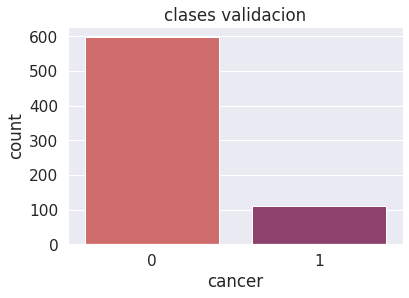

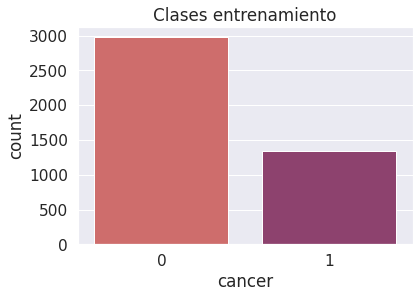

(707, 50, 50, 3) (4318, 50, 50, 3)


In [ ]:
plt.title('clases validacion')
sns.countplot(x=test_y,palette='flare')
plt.show()
plt.title('Clases entrenamiento')
sns.countplot(x=train_y,palette='flare')
plt.show()
print(test_x.shape, train_x.shape)
#actualmente el conjunto de imagenes estan en matrices 4D, por lo que sera necesario convertirlas a 2D multiplicando las imendiones de la imagen
#(50x50x3=7500)

In [ ]:


# Normalization
x_train = train_x/255.0
x_test = test_x/255.0
# Es necesario remodelar las imágenes del conjunto de datos en una matriz bidimensional. Esto se debe a que sklearn espera una matriz 2D como 
#entrada para la función fit() durante el entrenamiento
nsamples, nx, ny, nrgb = train_x.shape
x_train2 = train_x.reshape((nsamples,nx*ny*nrgb))
nsamples, nx, ny, nrgb = test_x.shape 
x_test2 = test_x.reshape((nsamples,nx*ny*nrgb))

#SVM

In [ ]:
svm=SVC()
svm.fit(x_train2,train_y)
y_pred_svm=svm.predict(x_test2)

accuracy_score(y_pred_svm,test_y)
print(classification_report(y_pred_svm,test_y))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92       702
           1       0.03      0.60      0.05         5

    accuracy                           0.85       707
   macro avg       0.51      0.72      0.48       707
weighted avg       0.99      0.85      0.91       707



#PCA

In [ ]:
#PCA a los datos entrenados

from sklearn.decomposition import PCA
pca = PCA(n_components=500, svd_solver="randomized", whiten=True).fit(x_train2)
X_train_pca = pca.transform(x_train2)
X_test_pca = pca.transform(x_test2)

In [ ]:
X_train_pca.shape, x_train2.shape # antes y despujes de reducir la domension

((4318, 500), (4318, 7500))

In [ ]:
X_test_pca.shape, x_test2.shape

((707, 500), (707, 7500))

In [ ]:
print(f"Channel : {sum(pca.explained_variance_ratio_)}")

Channel : 0.8998427187034395


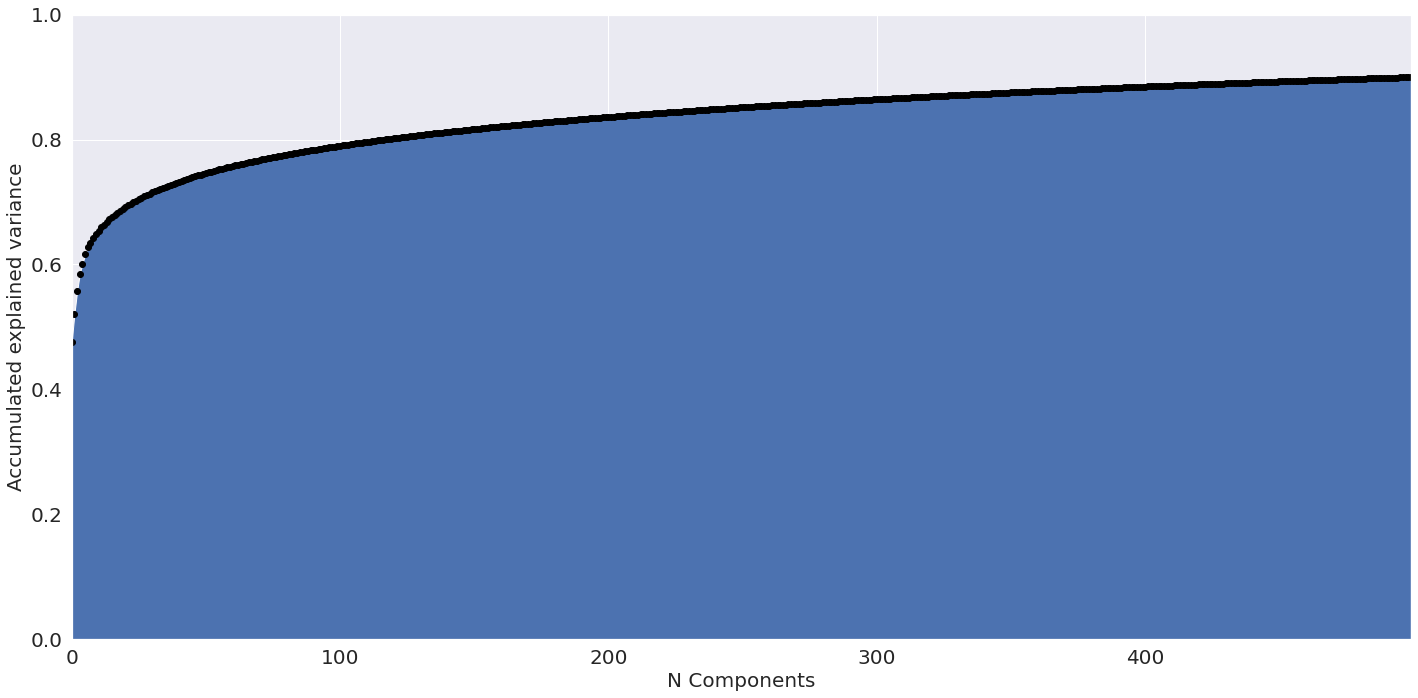

In [ ]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(20, 10))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_-1)
    ax.tick_params(axis='both', labelsize=20)
    ax.set_xlabel('N Components', fontsize=20)
    ax.set_ylabel('Accumulated explained variance', fontsize=20)
    plt.tight_layout()
    plt.show()
plot_explained_variance(pca)
plt.show()


#SVM with PCA

In [ ]:


param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

clf = clf.fit(X_train_pca, train_y)

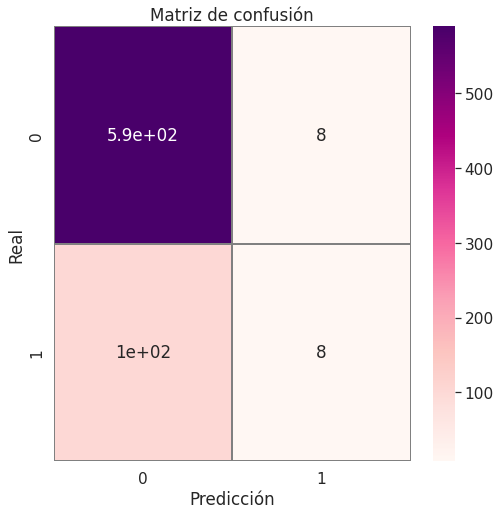

              precision    recall  f1-score   support

           0       0.99      0.85      0.91       691
           1       0.07      0.50      0.13        16

    accuracy                           0.84       707
   macro avg       0.53      0.68      0.52       707
weighted avg       0.97      0.84      0.90       707



In [ ]:
y_pred = clf.predict(X_test_pca)


f,ax = plt.subplots(figsize=(8, 8))
confusion_mtx = confusion_matrix(test_y, y_pred)
sns.set(font_scale=1.4)
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="RdPu",linecolor="gray",ax=ax)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión")
plt.show()

print(classification_report(y_pred,test_y))

#Random Forest

In [ ]:
model=RandomForestClassifier()
model.fit(x_train2,train_y)

RandomForestClassifier()

In [ ]:

y_pred=model.predict(x_test2)
accuracy_score(y_pred,test_y)
print(classification_report(y_pred,test_y))
confusion_matrix(y_pred,test_y)

              precision    recall  f1-score   support

           0       1.00      0.85      0.91       704
           1       0.01      0.33      0.02         3

    accuracy                           0.84       707
   macro avg       0.50      0.59      0.47       707
weighted avg       0.99      0.84      0.91       707



array([[595, 109],
       [  2,   1]])

#random forest with PCA

In [ ]:

mode=RandomForestClassifier()
mode.fit(X_train_pca, train_y)


RandomForestClassifier()

In [ ]:
y_predic = mode.predict(X_test_pca)
accuracy_score(y_predic,test_y)
print(classification_report(y_predic,test_y))
confusion_matrix(y_predic,test_y)

              precision    recall  f1-score   support

           0       1.00      0.84      0.92       707
           1       0.00      0.00      0.00         0

    accuracy                           0.84       707
   macro avg       0.50      0.42      0.46       707
weighted avg       1.00      0.84      0.92       707



array([[597, 110],
       [  0,   0]])

#Decision Tree

In [ ]:

dtc=DecisionTreeClassifier()
dtc.fit(x_train2,train_y)
y_pred_dtc=dtc.predict(x_test2)
y_pred_dtc
accuracy_score(y_pred_dtc,test_y)
print(classification_report(y_pred_dtc,test_y))

              precision    recall  f1-score   support

           0       0.76      0.83      0.79       548
           1       0.14      0.09      0.11       159

    accuracy                           0.66       707
   macro avg       0.45      0.46      0.45       707
weighted avg       0.62      0.66      0.64       707



#Decision Tree with PCA

In [ ]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train_pca, train_y)
y_pred_dt=dtc.predict(X_test_pca)
accuracy_score(y_pred_dt,test_y)
print(classification_report(y_pred_dt,test_y))

              precision    recall  f1-score   support

           0       0.94      0.85      0.89       658
           1       0.12      0.27      0.16        49

    accuracy                           0.81       707
   macro avg       0.53      0.56      0.53       707
weighted avg       0.88      0.81      0.84       707



Number of components explaining 95% variance: 987


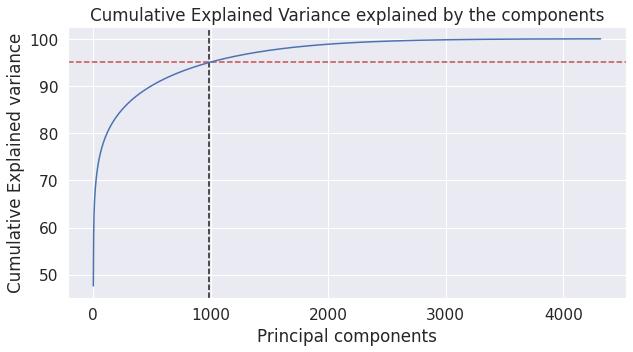

In [ ]:
# How many PCs explain 95% of the variance?

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)

In [ ]:
#PCA a los datos entrenados

from sklearn.decomposition import PCA
pca = PCA(n_components=100, svd_solver="randomized", whiten=True).fit(x_train2)
X_train_pca = pca.transform(x_train2)
X_test_pca = pca.transform(x_test2)

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

clf = clf.fit(X_train_pca, train_y)
y_pred = clf.predict(X_test_pca)
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.99      0.86      0.92       690
           1       0.10      0.65      0.17        17

    accuracy                           0.85       707
   macro avg       0.54      0.75      0.55       707
weighted avg       0.97      0.85      0.90       707



In [ ]:
pca = PCA(n_components=50, svd_solver="randomized", whiten=True).fit(x_train2)
X_train_pca = pca.transform(x_train2)
X_test_pca = pca.transform(x_test2)

param_grid = {
    "C": loguniform(1e3, 1e5),
    "gamma": loguniform(1e-4, 1e-1),
}
clf = RandomizedSearchCV(
    SVC(kernel="rbf", class_weight="balanced"), param_grid, n_iter=10
)

clf = clf.fit(X_train_pca, train_y)
y_pred = clf.predict(X_test_pca)
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.98      0.86      0.92       685
           1       0.12      0.59      0.20        22

    accuracy                           0.85       707
   macro avg       0.55      0.72      0.56       707
weighted avg       0.96      0.85      0.89       707

